In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder




In [6]:
# Load the dataset
df = pd.read_csv('guvi_courses.csv')
df

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.500000,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.500000,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.000000,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.000000,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.500000,2016-03-08T22:28:36Z,Subject: Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
3675,1216340.0,Learn to Play Sweet Child of Mine,https://www.udemy.com/learn-to-play-sweet-chil...,20.0,0.0,0.0,23.0,All Levels,0.31,1.500000,2017-06-30T17:33:29Z,Musical Instruments
3676,1026762.0,Coaching Course: Rhythm Instruction for Music ...,https://www.udemy.com/coaching-bundle-rhythm-i...,125.0,0.0,0.0,7.0,Beginner Level,0.06,0.633333,2017-03-10T17:06:46Z,Musical Instruments
3677,1223240.0,Learn Pirates of the Caribbean by Ear on the P...,https://www.udemy.com/learn-pirates-of-the-car...,20.0,0.0,0.0,6.0,All Levels,0.08,0.533333,2017-05-22T17:14:43Z,Musical Instruments
3678,1224186.0,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,35.0,0.0,0.0,13.0,Beginner Level,0.78,0.516667,2017-05-30T00:19:02Z,Musical Instruments


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [10]:
df['num_subscribers'].min()

0.0

In [14]:
df['num_lectures'].max()

779.0

In [71]:
column_names=df.columns
column_names

Index(['course_id', 'course_title', 'url', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'Rating', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [72]:
for i in column_names:
    df[i].fillna('nan')
    df[i].dropna(inplace=True)
    print(i," - ",df[i].nunique())
    if df[i].nunique()<6:
        print(df[i].unique())

course_id  -  3672
course_title  -  3663
url  -  3672
price  -  38
num_subscribers  -  2197
num_reviews  -  511
num_lectures  -  229
level  -  4
['Beginner Level' 'Expert Level' 'All Levels' 'Intermediate Level' nan]
Rating  -  101
content_duration  -  105
published_timestamp  -  3672
subject  -  4
['Subject: Web Development' nan 'Business Finance' 'Graphic Design'
 'Musical Instruments']


In [74]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [78]:
encoder = LabelEncoder()
df['level'] = encoder.fit_transform(df['level'])
df['subject'] = encoder.fit_transform(df['subject'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3680 non-null   int32  
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3680 non-null   int32  
dtypes: float64(7), int32(2), object(3)
memory usage: 316.4+ KB


In [80]:
for i in column_names:
    print(i," - ",df[i].nunique())
    if df[i].nunique()<6:
        print(df[i].unique())

course_id  -  3672
course_title  -  3663
url  -  3672
price  -  38
num_subscribers  -  2197
num_reviews  -  511
num_lectures  -  229
level  -  5
[1 2 0 3 4]
Rating  -  101
content_duration  -  105
published_timestamp  -  3672
subject  -  5
[3 4 0 1 2]


In [ ]:




# Encode categorical variables
encoder = LabelEncoder()
data['level'] = encoder.fit_transform(data['level'])
data['subject'] = encoder.fit_transform(data['subject'])

# Convert 'published_timestamp' to days since publication
current_date = datetime.now()
data['published_timestamp'] = pd.to_datetime(data['published_timestamp']).dt.tz_localize(None)  # Remove timezone information
data['days_since_published'] = (current_date - data['published_timestamp']).dt.days
data.drop('published_timestamp', axis=1, inplace=True)

# Feature Selection
selected_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'subject', 'days_since_published']
X = data[selected_features]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Regression Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Optional: Hyperparameter Tuning, Deployment, Monitoring, and Updating


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# Load the dataset
data = pd.read_csv('guvi_courses.csv')

# Data Preprocessing
# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
data['level'] = encoder.fit_transform(data['level'])
data['subject'] = encoder.fit_transform(data['subject'])

# Convert 'published_timestamp' to days since publication
current_date = datetime.now()
data['published_timestamp'] = pd.to_datetime(data['published_timestamp']).dt.tz_localize(None)  # Remove timezone information
data['days_since_published'] = (current_date - data['published_timestamp']).dt.days
data.drop('published_timestamp', axis=1, inplace=True)

# Feature Selection
selected_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'subject', 'days_since_published']
X = data[selected_features]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Regression Model
model = LinearRegression()

# Train the Model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Optional: Hyperparameter Tuning, Deployment, Monitoring, and Updating


In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Load the dataset
data = pd.read_csv('guvi_courses.csv')

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
data['level'] = encoder.fit_transform(data['level'])
data['subject'] = encoder.fit_transform(data['subject'])

# Convert 'published_timestamp' to days since publication
current_date = datetime.now()
data['published_timestamp'] = pd.to_datetime(data['published_timestamp']).dt.tz_localize(None)  # Remove timezone information
data['days_since_published'] = (current_date - data['published_timestamp']).dt.days
data.drop('published_timestamp', axis=1, inplace=True)
# Feature Selection (same as in your previous code)
# Feature Selection
selected_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'subject', 'days_since_published']
X = data[selected_features]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Train and evaluate each model
best_model = None
best_rmse = float('inf')  # Initialize with a large value

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name} RMSE: {rmse}")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

print(f"Best Model: {type(best_model).__name__} with RMSE: {best_rmse}")

# Save the best model using pickle
with open('best_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


Linear Regression RMSE: 0.3262059841430192
Ridge Regression RMSE: 0.3262065676805604
Lasso Regression RMSE: 0.333331492640386
Decision Tree Regressor RMSE: 0.35656002909443746
Random Forest Regressor RMSE: 0.2648821899279091
Gradient Boosting Regressor RMSE: 0.2771434270887142
Best Model: RandomForestRegressor with RMSE: 0.2648821899279091


Linear Regression RMSE: 0.32620628217504377
Ridge Regression RMSE: 0.32620686567821766
Lasso Regression RMSE: 0.3333317045093985
Decision Tree Regressor RMSE: 0.35639785261393775
Random Forest Regressor RMSE: 0.2686641954521197
Gradient Boosting Regressor RMSE: 0.2787868147380451
Best Model: RandomForestRegressor with RMSE: 0.2686641954521197


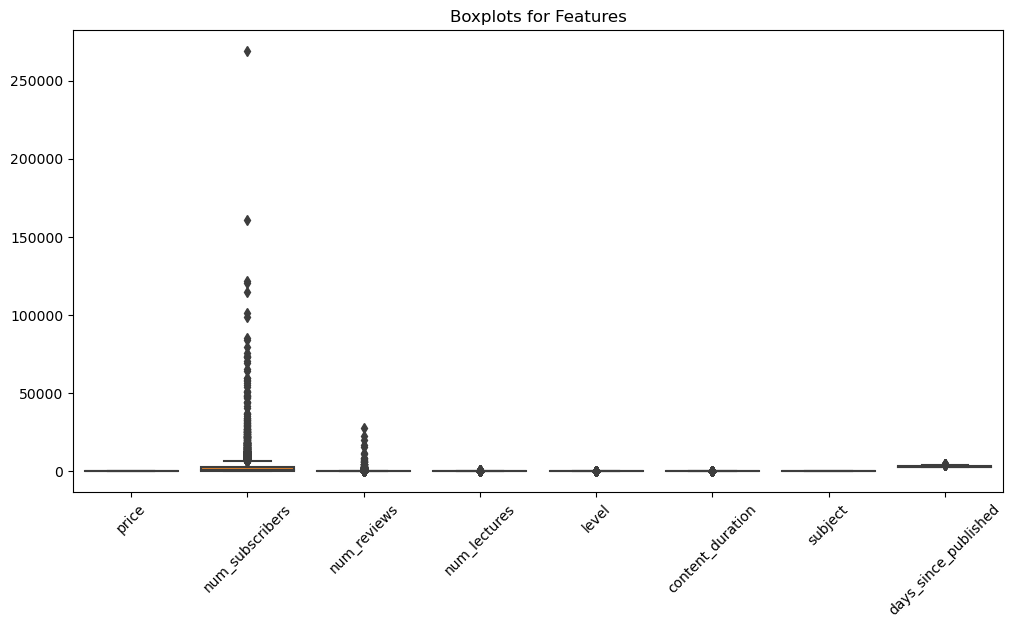

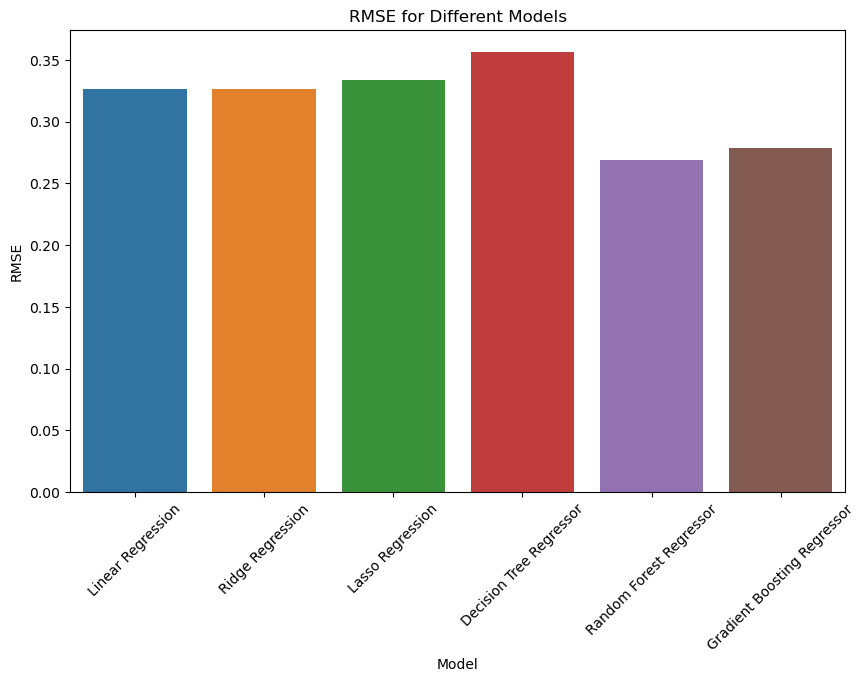

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import pickle

# Load the dataset
data = pd.read_csv('guvi_courses.csv')

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
encoder = LabelEncoder()
data['level'] = encoder.fit_transform(data['level'])
data['subject'] = encoder.fit_transform(data['subject'])

# Convert 'published_timestamp' to days since publication
current_date = datetime.now()
data['published_timestamp'] = pd.to_datetime(data['published_timestamp']).dt.tz_localize(None)  # Remove timezone information
data['days_since_published'] = (current_date - data['published_timestamp']).dt.days
data.drop('published_timestamp', axis=1, inplace=True)

# Feature Selection
selected_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'subject', 'days_since_published']
X = data[selected_features]
y = data['Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary to store the regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

# Initialize lists to store RMSE values for each model
rmse_values = []

# Train and evaluate each model
best_model = None
best_rmse = float('inf')  # Initialize with a large value

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"{model_name} RMSE: {rmse}")
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
    
    rmse_values.append((model_name, rmse))

print(f"Best Model: {type(best_model).__name__} with RMSE: {best_rmse}")

# Save the best model using pickle
with open('best_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Visualizations
# Boxplots for each feature to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=X)
plt.title("Boxplots for Features")
plt.xticks(rotation=45)
plt.show()



# Bar plot for RMSE values of different models
rmse_df = pd.DataFrame(rmse_values, columns=['Model', 'RMSE'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE',data=rmse_df)
plt.title("RMSE for Different Models")
plt.xticks(rotation=45)
plt.show()
